In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#### Authentication part

consumerKey="8AO6OU5ubyi4XO47b1C7Sjdlz"
consumerSecret = "FS1usPrfPolvjLXbwGka5N8TWkOZhUsdxGmmTwuO016koesUSt"
acessToken = "1151573806680592384-OUFeUtpsRFZM6jQxl1AG99NEjlY0Kt"
acessTokenSecret = "KKHmkHkDGVaDof8XK4fKKI52DmNl4vZlaXnx85WRfd4Lr"

auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(acessToken,acessTokenSecret)
api = tweepy.API(auth)


In [3]:
##Sentiment Analysis 

# now we can connect to API storge server of twitter



api_connect=tweepy.API(auth)

# now you can search any topic on twitter
#tweet_data=api_connect.search('India',count=100)


In [6]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: lockdown
Please enter how many tweets to analyze: 2500


In [5]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...


True

In [7]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  689
negative number:  425
neutral number:  1386


In [8]:
tweet_list


,0
0,Impact of pandemic and lockdown on Rajasthan's...
1,RT @Cawnporiaah: “The Great Reset” Is Here: Fo...
2,RT @ROLLING_KPOP: 🔉 #TRANSONGLATION Challenge ...
3,RT @MaxBoot: By downplaying the need for masks...
4,RT @the_EPEX: [📺]\n[입덕돌] EPEX (이펙스)｜ Lock Down...
...,...
2495,RT @MaximeBernier: Vigils should be held in ev...
2496,"RT @DMinghella: So hang on, Hancock knew way b..."
2497,RT @the_EPEX: [🎞]\nEPEX(이펙스)-Lock Down M/V\n\n...
2498,Best and safest option to fighting the virus a...


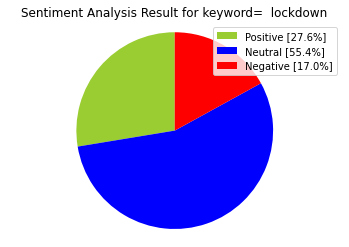

In [9]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Impact of pandemic and lockdown on Rajasthan's...,impact of pandemic and lockdown on rajasthan s...
1,RT @Cawnporiaah: “The Great Reset” Is Here: Fo...,the great reset is here follow the money ...
2,RT @ROLLING_KPOP: 🔉 #TRANSONGLATION Challenge ...,transonglation challenge epex loc...
3,RT @MaxBoot: By downplaying the need for masks...,by downplaying the need for masks and express...
4,RT @the_EPEX: [📺]\n[입덕돌] EPEX (이펙스)｜ Lock Down...,epex lock down stone music ...
5,RT @Mr_Considerate: I don’t want to alarm anyo...,i don t want to alarm anyone but i ve just b...
6,RT @edwinarockia: Village 6 &amp; Day 6:\n\nஇன...,village 6 amp day 6 ...
7,RT @mighvv: Kalau hari ini korang nak buat #Se...,kalau hari ini korang nak buat sedekahjumaat...
8,"RT @TradeBOC: If there is one actor, who has b...",if there is one actor who has back to back p...
9,RT @the_EPEX: [📺]\n‘HOT DEBUT' 솔직 당당 'EPEX(이펙스...,hot debut epex lock down...


In [11]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Impact of pandemic and lockdown on Rajasthan's...,impact of pandemic and lockdown on rajasthan s...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @Cawnporiaah: “The Great Reset” Is Here: Fo...,the great reset is here follow the money ...,-0.100000,0.512500,positive,0.124,0.688,0.188,0.3400
2,RT @ROLLING_KPOP: 🔉 #TRANSONGLATION Challenge ...,transonglation challenge epex loc...,0.000000,0.000000,positive,0.000,0.874,0.126,0.0772
3,RT @MaxBoot: By downplaying the need for masks...,by downplaying the need for masks and express...,0.000000,0.000000,negative,0.252,0.641,0.107,-0.3400
4,RT @the_EPEX: [📺]\n[입덕돌] EPEX (이펙스)｜ Lock Down...,epex lock down stone music ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
5,RT @Mr_Considerate: I don’t want to alarm anyo...,i don t want to alarm anyone but i ve just b...,0.000000,0.000000,positive,0.068,0.724,0.207,0.5346
6,RT @edwinarockia: Village 6 &amp; Day 6:\n\nஇன...,village 6 amp day 6 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @mighvv: Kalau hari ini korang nak buat #Se...,kalau hari ini korang nak buat sedekahjumaat...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"RT @TradeBOC: If there is one actor, who has b...",if there is one actor who has back to back p...,0.000000,0.333333,neutral,0.000,1.000,0.000,0.0000
9,RT @the_EPEX: [📺]\n‘HOT DEBUT' 솔직 당당 'EPEX(이펙스...,hot debut epex lock down...,0.047222,0.569444,neutral,0.000,1.000,0.000,0.0000


In [12]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,1341,53.64
positive,592,23.68
negative,567,22.68


In [15]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

NameError: name 'pc' is not defined